In [11]:
from sklearn.cluster import KMeans # use kmeans algorithm in sklearn library 
from matplotlib.image import imread, imsave # read image, save result picture 
import numpy as np
import time
from collections import Counter 
import pandas as pd
from matplotlib import pyplot as plt # draw plot
%matplotlib inline

In [ ]:
# Read the image

In [75]:
img = imread('colors.jpg')
img_size = img.shape

In [76]:
# Reshape it to be 2-dimension

In [77]:
X = img.reshape(img_size[0] * img_size[1], img_size[2])
print("This image has {} pixels".format(len(X)))

This image has 2797440 pixels


In [78]:
# Run the Kmeans algorithm

In [79]:
#count the number of unique colors in the picture
colors = Counter([tuple(i) for i in X]) 
# Creating a dataframe including unique colors and their frequency in the image
# Output = pd.DataFrame(data ={'list': list(dict.keys()), 
#                          'count': list(dict.values())}) 

print("This picture has {} colors".format(len(colors))) 

This picture has 765066 colors


In [80]:
k = int(input("How many colors do you want? "))

How many colors do you want? 10


In [81]:
start = time.time()
km = KMeans(n_clusters = k)
km.fit(X)
finish = time.time()
print(f"Processing time: {finish - start}")

Processing time: 100.01006174087524


In [37]:
# Use the centroids to compress the image

In [82]:
X_compressed = km.cluster_centers_[km.labels_]

In [83]:
# convert all values in X_compressed from float type to integer type because a color in RGB is demonstrated as a triplet of integer. 

In [84]:
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

In [85]:
# Reshape X_recovered to have the same dimension as the original image

In [86]:
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

In [87]:
# Plot the original and the compressed image next to each other

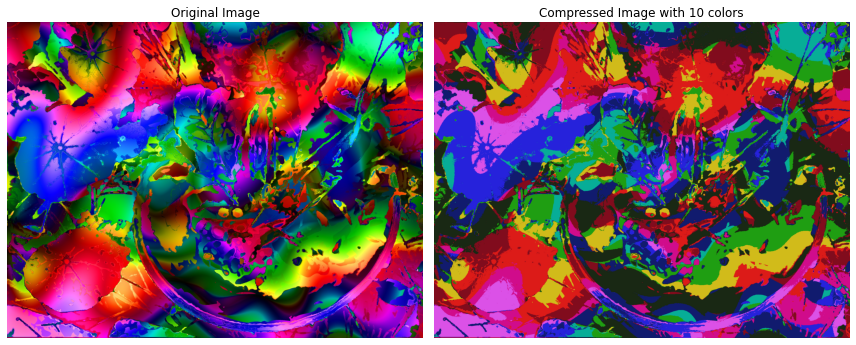

In [88]:
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with {} colors'.format(k))
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

In [89]:
imsave("result//result{}.jpg".format(2), X_compressed, dpi = 100)